In [33]:
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import(
    cross_validate,
    StratifiedKFold
)
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')


1. Load the Data

In [7]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/Y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/Y_test.npz')['arr_0']

2. Define Parameter Grids

In [1]:
lr_param = {            
    'max_iter': [500, 1000, 2000]
}

rf_param_grid = {
    'max_depth': [8, 12, 16, 20],
    'n_estimators': [50, 100, 150, 200],
    'criterion': ["gini","entropy","log_loss"]
}

df_param_grid = {
    'max_depth': [8, 12, 16, 20],
    'criterion': ["gini","entropy","log_loss"]
}

3. Configure K-Fold CV

In [23]:
cv = StratifiedKFold(
    n_splits=6,
    random_state=42,
    shuffle=True
)

In [29]:
trained_models = {}  # store best estimator for each model

# Use StratifiedKFold if no groups
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    print(f"\nCross-validation on {model_name}...")

    cv_results = cross_validate(
        model,
        X_train,
        Y_train,
        cv=cv,
        scoring='f1',           # use f1 for binary
        return_estimator=True,
        return_train_score=False
    )

    # Pick the estimator with the best F1 score
    test_scores = cv_results['test_score']
    best_index = np.argmax(test_scores)
    best_estimator = cv_results['estimator'][best_index]

    # Store it
    trained_models[model_name] = best_estimator

    print(f"Best F1 score for {model_name}: {test_scores[best_index]}")
    print(f"Best estimator:\n{best_estimator}")


Cross-validation on Logistic Regression...
Best F1 score for Logistic Regression: 0.7504942665085014
Best estimator:
LogisticRegression()

Cross-validation on Decision Tree...
Best F1 score for Decision Tree: 0.8326878388845856
Best estimator:
DecisionTreeClassifier()

Cross-validation on Random Forest...
Best F1 score for Random Forest: 0.896578843885175
Best estimator:
RandomForestClassifier()


In [31]:
Y_hat_tests = {}
for model_name, model in trained_models.items():
    Y_hat_test = model.predict(X_test)   # <-- Use X_test here
    Y_hat_tests[model_name] = Y_hat_test

Y_hat_tests

{'Logistic Regression': array([0, 0, 0, ..., 0, 0, 1], shape=(1999,)),
 'Decision Tree': array([0, 1, 0, ..., 1, 0, 1], shape=(1999,)),
 'Random Forest': array([0, 0, 0, ..., 1, 0, 1], shape=(1999,))}

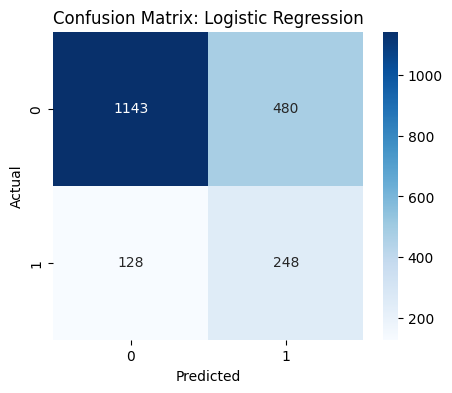

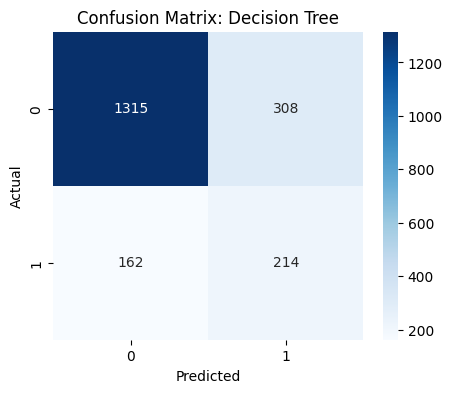

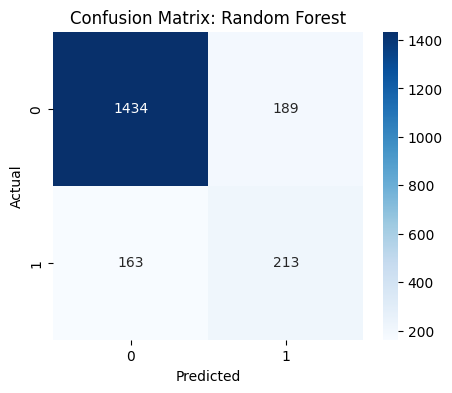

In [34]:
# Y_hat_tests already contains predictions for X_test
for model_name, Y_pred in Y_hat_tests.items():
    cm = confusion_matrix(Y_test, Y_pred)  # confusion matrix
    
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()